In [19]:
import pandas as pd
import numpy as np
from MOBPY import MonotonicBinner, BinningConstraints
from MOBPY.plot import plot_bin_statistics, plot_pava_comparison
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/chentahung/Desktop/git/mob-py/data/german_data_credit_cat.csv')
# Convert default to 0/1 (original is 1/2)
df['default'] = df['default'] - 1

In [20]:
# Configure constraints
constraints = BinningConstraints(
    min_bins=4,           # Minimum number of bins
    max_bins=6,           # Maximum number of bins
    min_samples=0.05,     # Each bin needs at least 5% of total samples
    min_positives=0.01    # Each bin needs at least 1% of total positive samples
)

In [21]:
# Create and fit the binner
binner = MonotonicBinner(
    df=df,
    x='Durationinmonth',
    y='default',
    constraints=constraints
)
binner.fit()

2025-08-27 23:08:11 - MOBPY.core.merge - WARNING - Could not satisfy min_samples for 2 bins (reached min_bins=4 limit)


MonotonicBinner(x='Durationinmonth', y='default', sign='auto', status=fitted, n_bins=4)

In [22]:
# Get binning results
bins = binner.bins_()        # Bin boundaries
summary = binner.summary_()  # Detailed statistics with WoE/IV
display(summary)

,bucket,count,count_pct,sum,mean,std,min,max,woe,iv
0,"(-inf, 9)",94,9.4,10.0,0.106383,0.309980,0.0,1.0,1.241870,0.106307
1,"[9, 16)",337,33.7,79.0,0.234421,0.424267,0.0,1.0,0.335632,0.035238
2,"[16, 45)",499,49.9,171.0,0.342685,0.475084,0.0,1.0,-0.193553,0.019342
3,"[45, +inf)",70,7.0,40.0,0.571429,0.498445,0.0,1.0,-1.127082,0.102180


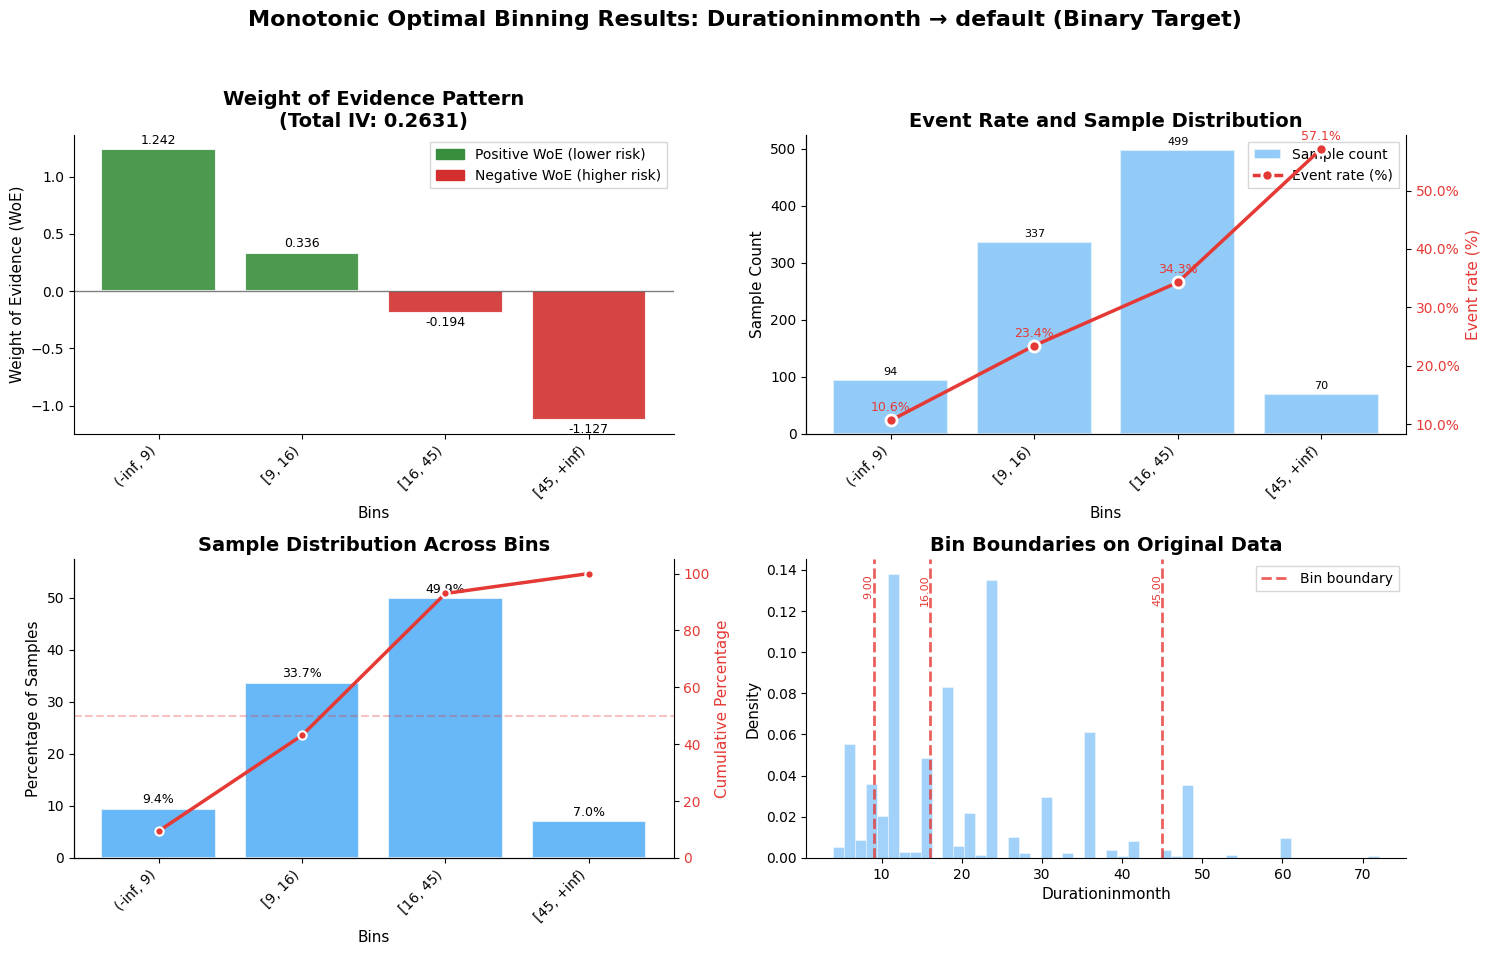

In [23]:
# Generate comprehensive binning analysis plot
fig = plot_bin_statistics(binner)
plt.show()

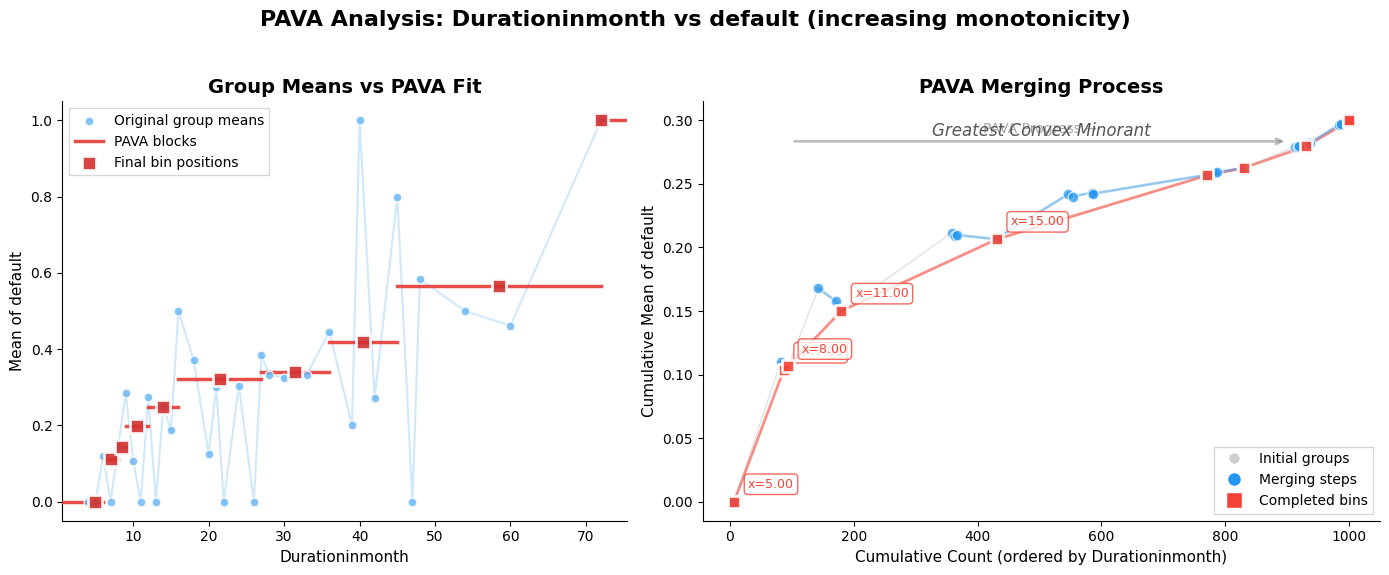

In [24]:
# 1. Group means with PAVA monotonic fit
# 2. PAVA merging process with "Greatest Convex Minorant" subtitle
fig = plot_pava_comparison(binner, figsize=(14, 6))
plt.show()

In [25]:
# Check initial PAVA blocks vs final bins
print(f"PAVA blocks: {len(binner.pava_blocks_())}")
print(f"Final bins: {len(binner.bins_())}")

PAVA blocks: 10
Final bins: 4


In [26]:
# Fractional constraints (adaptive to data size)
constraints = BinningConstraints(
    max_bins=8,
    min_samples=0.05,     # 5% of total samples
    max_samples=0.30,     # 30% of total samples
    min_positives=0.01    # 1% of positive samples
)

# Absolute constraints (fixed values)
constraints = BinningConstraints(
    max_bins=5,
    min_samples=100,      # At least 100 samples per bin
    max_samples=500       # At most 500 samples per bin
)

In [30]:
# Exclude special codes from binning
age_binner = MonotonicBinner(
    df=df,
    x='Age',
    y='default',
    constraints= constraints,
    exclude_values=[-999, -1, 0]  # Treat as separate bins
).fit()

2025-08-27 23:08:23 - MOBPY.core.merge - WARNING - Could not satisfy min_samples for 2 bins (reached min_bins=4 limit)


In [ ]:
new_data = pd.DataFrame({'age': [25, 45, 65]})

# Get bin assignments
bins = age_binner.transform(new_data['age'], assign='interval')
print(bins)
# Output:
# 0    (-inf, 26)
# 1      [35, 75)
# 2      [35, 75)
# Name: age, dtype: object

# Get WoE values for scoring
print(age_binner.transform(new_data['age'], assign='woe'))
# Output:
# 0   -0.526748
# 1    0.306015
# 2    0.306015
# Name: age, dtype: float64

0    (-inf, 26)
1      [35, 75)
2      [35, 75)
Name: age, dtype: object
0   -0.526748
1    0.306015
2    0.306015
Name: age, dtype: float64
